<a href="https://colab.research.google.com/github/Chochoho/AIFFEL_quest_cr/blob/main/MainQuest/Quest02/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 👍 ☕***포켓몬스터, 전설의 포켓몬과 일반 포켓몬을 구분하라 ! 🐕***


❤ kaggle competition([link](https://www.kaggle.com/datasets/abcsds/pokemon))에 참가하여 보자!!!!!

In [387]:
pip install tensorflow numpy pandas scikit-learn


1️⃣ 데이터 로드 및 탐색 (파일 업로드 & 데이터 확인)

# Pokémon 전설 여부 예측 프로젝트
 Pokémon 데이터셋을 사용하여 **일반/전설 포켓몬을 예측하는 분류 모델**을 만들었습니다.

## 프로젝트 목표
- **데이터 전처리:** 불필요한 열 제거, 결측치 처리, 범주형 데이터 변환, 정규화
- **기본 모델(Decision Tree) 학습 및 평가**
- **Feature Engineering 적용 후 모델 성능 비교**
- **Random Forest, SVM, Logistic Regression을 활용한 비교 모델 실험**
- **각 모델의 성능 분석 및 최적 모델 선택**


In [388]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv("Pokemon.csv")  # 업로드한 파일 사용

# 불필요한 열 제거
df_cleaned = df.drop(columns=["#", "Name", "Type 2", "Generation"])

# 데이터 변환
df_cleaned = pd.get_dummies(df_cleaned, columns=["Type 1"], prefix="Type")

# Feature Engineering 추가 (공격력/방어력 비율, 특수 공격/특수 방어 비율)
df_cleaned["Attack/Defense"] = df_cleaned["Attack"] / df_cleaned["Defense"]
df_cleaned["Sp. Atk/Sp. Def"] = df_cleaned["Sp. Atk"] / df_cleaned["Sp. Def"]

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(columns=["Legendary"]),
                                                    df_cleaned["Legendary"],
                                                    test_size=0.2, random_state=42)

print("데이터 준비 완료!")


데이터 준비 완료!


In [389]:
from google.colab import drive
import pandas as pd

# 1️)Google Drive 마운트
drive.mount('/content/drive')

# 2️)파일 경로 설정 (Google Drive에 업로드한 Pokemon.csv 경로 입력)
file_path = "/content/drive/My Drive/Pokemon.csv"  # 파일이 있는 위치 확인 후 경로 수정

# 3️)CSV 파일 불러오기
df = pd.read_csv(file_path)

# 4️)데이터 확인
print(df.head())  # 데이터 샘플 출력


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [390]:
import pandas as pd

df = pd.read_csv("Pokemon.csv")  # 업로드한 파일 경로 확인 후 사용
df.head()  # 데이터 확인


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


 2️⃣ 기본 모델(Decision Tree) 학습

베이스라인 Decision Tree 모델 정확도: 0.9625

분류 보고서:
               precision    recall  f1-score   support

    Ordinary       0.99      0.97      0.98       150
   Legendary       0.64      0.90      0.75        10

    accuracy                           0.96       160
   macro avg       0.82      0.93      0.86       160
weighted avg       0.97      0.96      0.97       160



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

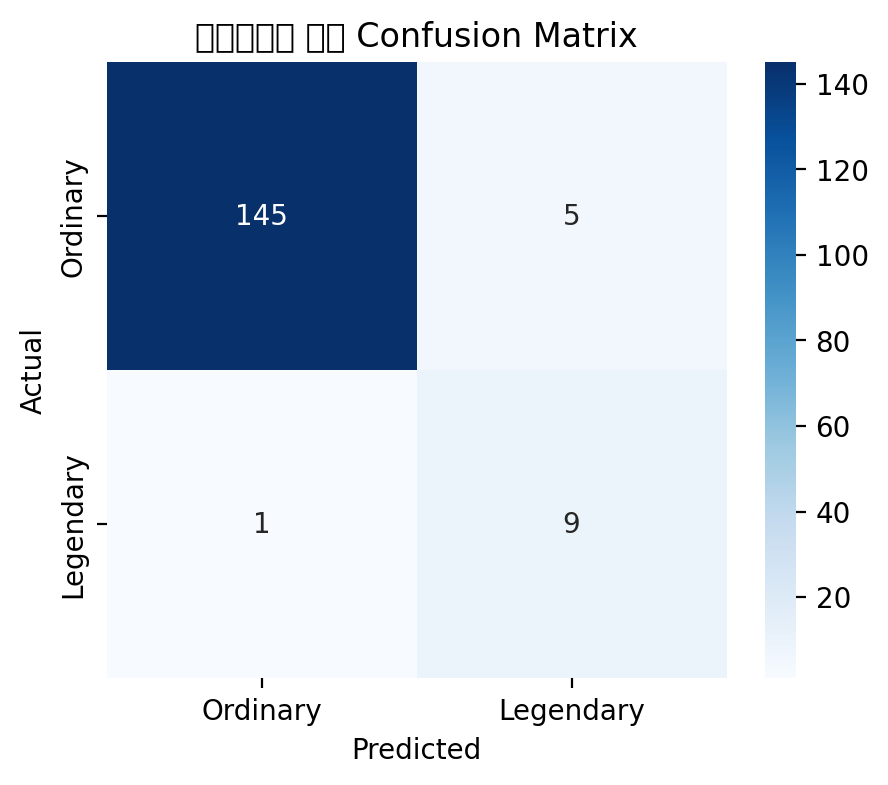

In [391]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 불필요한 열 제거
df_cleaned = df.drop(columns=["#", "Name", "Type 2", "Generation"])

# 범주형 데이터 변환 (One-Hot Encoding)
df_cleaned = pd.get_dummies(df_cleaned, columns=["Type 1"], prefix="Type")

# Feature Engineering 추가 (공격력/방어력 비율, 특수 공격/특수 방어 비율)
df_cleaned["Attack/Defense"] = df_cleaned["Attack"] / df_cleaned["Defense"]
df_cleaned["Sp. Atk/Sp. Def"] = df_cleaned["Sp. Atk"] / df_cleaned["Sp. Def"]

# 베이스라인 모델 학습을 위한 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(columns=["Legendary"]),
                                                    df_cleaned["Legendary"],
                                                    test_size=0.2, random_state=42)

# 베이스라인 Decision Tree 모델 학습 (Feature Engineering 적용 후)
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# 모델 예측 수행
y_pred_baseline = baseline_model.predict(X_test)

# 모델 성능 평가

## 정확도를 출력합니다
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"베이스라인 Decision Tree 모델 정확도: {baseline_accuracy:.4f}")

## 분류 보고서를 출력합니다 (Precision, Recall, F1-score 포함)
baseline_report = classification_report(y_test, y_pred_baseline, target_names=["Ordinary", "Legendary"])
print("\n분류 보고서:\n", baseline_report)

## 혼동 행렬(Confusion Matrix)을 출력하고 시각화합니다
cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ordinary", "Legendary"], yticklabels=["Ordinary", "Legendary"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("베이스라인 모델 Confusion Matrix")
plt.show()


3️⃣ 비교 모델 실험 (Random Forest, SVM, Logistic Regression)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


베이스라인 Decision Tree 모델 정확도: 0.9625
랜덤 포레스트 모델 정확도: 0.9500
SVM 모델 정확도: 0.9563
로지스틱 회귀 모델 정확도: 0.9563

랜덤 포레스트 분류 보고서:
               precision    recall  f1-score   support

    Ordinary       0.99      0.96      0.97       150
   Legendary       0.57      0.80      0.67        10

    accuracy                           0.95       160
   macro avg       0.78      0.88      0.82       160
weighted avg       0.96      0.95      0.95       160


SVM 분류 보고서:
               precision    recall  f1-score   support

    Ordinary       0.97      0.98      0.98       150
   Legendary       0.67      0.60      0.63        10

    accuracy                           0.96       160
   macro avg       0.82      0.79      0.80       160
weighted avg       0.95      0.96      0.96       160


로지스틱 회귀 분류 보고서:
               precision    recall  f1-score   support

    Ordinary       0.98      0.97      0.98       150
   Legendary       0.64      0.70      0.67        10

    accuracy                    

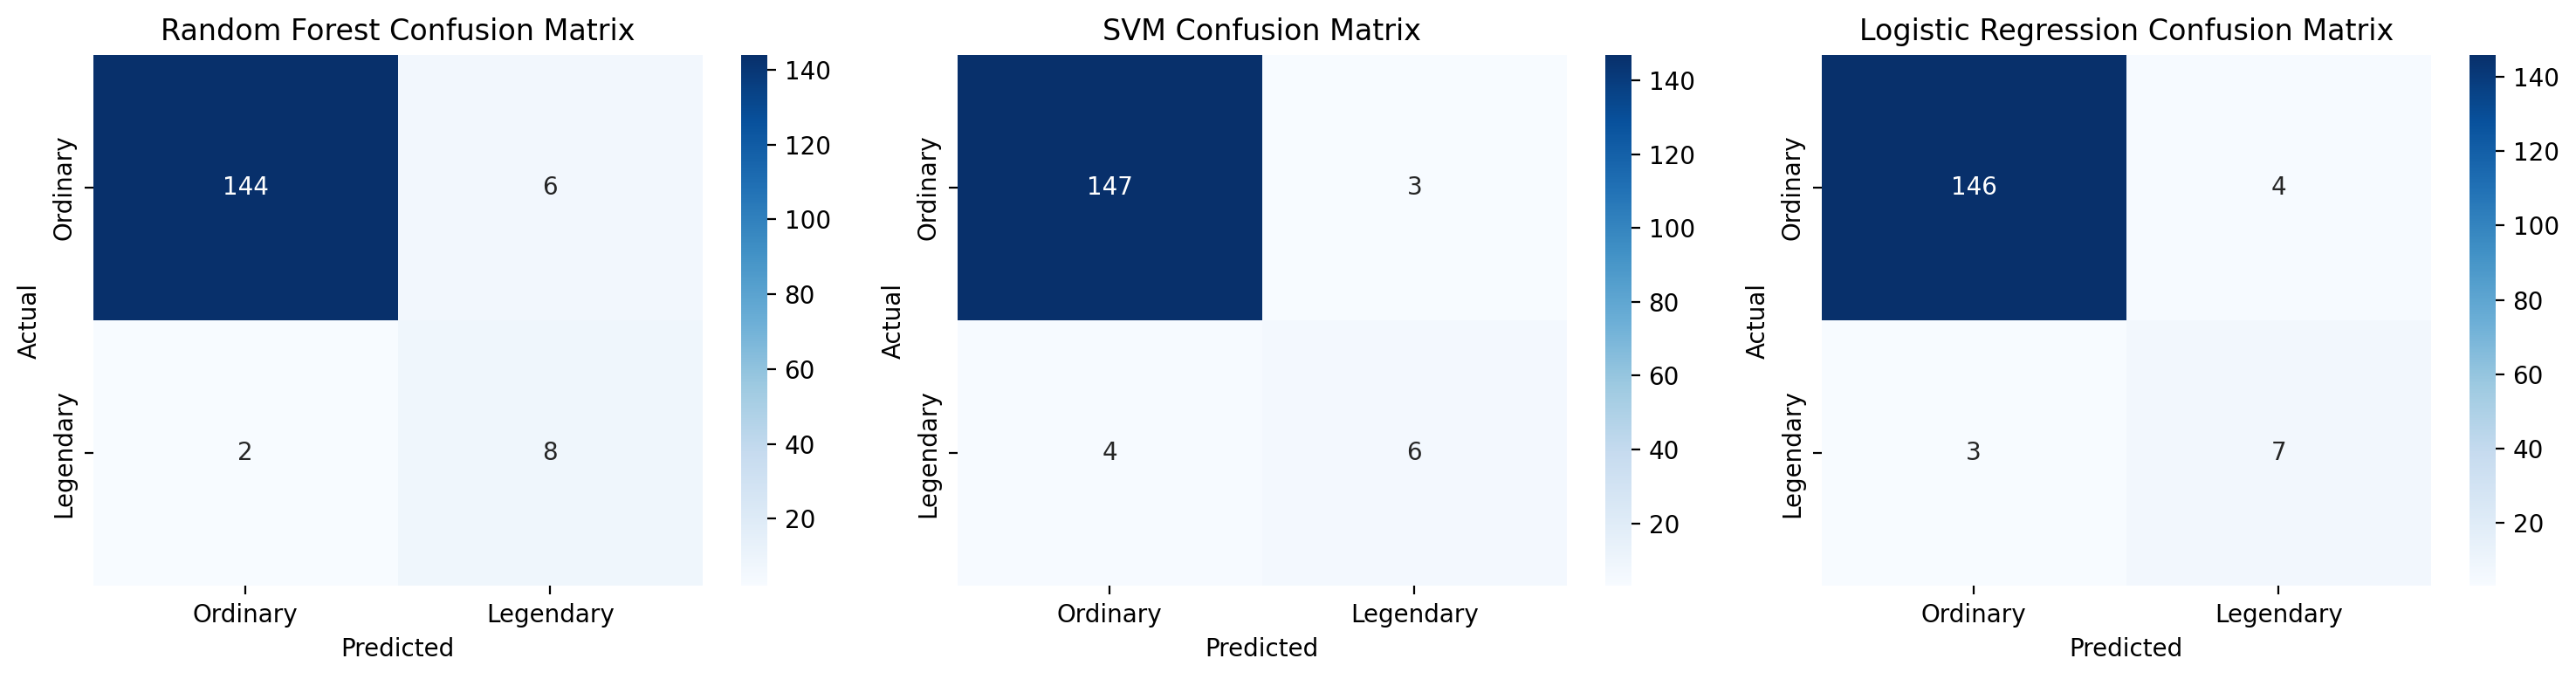

In [392]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️)비교 모델 정의
random_forest = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# 2️)비교 모델 학습
random_forest.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# 3️)비교 모델 예측 수행
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)

# 4️)모델 성능 평가 (정확도)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# 5️)성능 비교 출력
print(f"베이스라인 Decision Tree 모델 정확도: {baseline_accuracy:.4f}")
print(f"랜덤 포레스트 모델 정확도: {accuracy_rf:.4f}")
print(f"SVM 모델 정확도: {accuracy_svm:.4f}")
print(f"로지스틱 회귀 모델 정확도: {accuracy_lr:.4f}")

# 6️)분류 보고서 출력 (각 모델 비교)
print("\n랜덤 포레스트 분류 보고서:\n", classification_report(y_test, y_pred_rf, target_names=["Ordinary", "Legendary"]))
print("\nSVM 분류 보고서:\n", classification_report(y_test, y_pred_svm, target_names=["Ordinary", "Legendary"]))
print("\n로지스틱 회귀 분류 보고서:\n", classification_report(y_test, y_pred_lr, target_names=["Ordinary", "Legendary"]))

# 7️)혼동 행렬 시각화 (랜덤 포레스트 vs SVM vs 로지스틱 회귀)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

models = [("Random Forest", y_pred_rf), ("SVM", y_pred_svm), ("Logistic Regression", y_pred_lr)]
for i, (name, y_pred) in enumerate(models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ordinary", "Legendary"], yticklabels=["Ordinary", "Legendary"], ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


4️⃣데이터 전처리


In [393]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1️)데이터 불러오기
# Kaggle Pokémon 데이터를 로드합니다.
df = pd.read_csv("Pokemon.csv")

# 2️)불필요한 열 제거
# "#" (인덱스), "Name" (이름), "Type 2" (보조 타입), "Generation" (세대 정보) 제거
df = df.drop(columns=["#", "Name", "Type 2", "Generation"])

# 3️)범주형 데이터 변환 (One-Hot Encoding)
# "Type 1"을 숫자로 변환하여 모델이 학습할 수 있도록 합니다.
df = pd.get_dummies(df, columns=["Type 1"], prefix="Type")

# 4️)새로운 특징 생성 (Feature Engineering)
# 공격력/방어력 비율 및 특수 공격/특수 방어 비율 추가
df["Attack/Defense"] = df["Attack"] / df["Defense"]
df["Sp. Atk/Sp. Def"] = df["Sp. Atk"] / df["Sp. Def"]

# 5️)데이터 정규화 (MinMax Scaling)
# "Total" 값을 0~1 범위로 정규화하여 모델 성능을 향상시킵니다.
scaler = MinMaxScaler()
df["Total_Scaled"] = scaler.fit_transform(df[["Total"]])

# 6️)전처리된 데이터 확인
print("전처리를 완료했습니다. 그리고 데이터 샘플을 확인 했습니다.:")
print(df.head())


전처리를 완료했습니다. 그리고 데이터 샘플을 확인 했습니다.:
   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary  Type_Bug  \
0    318  45      49       49       65       65     45      False     False   
1    405  60      62       63       80       80     60      False     False   
2    525  80      82       83      100      100     80      False     False   
3    625  80     100      123      122      120     80      False     False   
4    309  39      52       43       60       50     65      False     False   

   Type_Dark  ...  Type_Ice  Type_Normal  Type_Poison  Type_Psychic  \
0      False  ...     False        False        False         False   
1      False  ...     False        False        False         False   
2      False  ...     False        False        False         False   
3      False  ...     False        False        False         False   
4      False  ...     False        False        False         False   

   Type_Rock  Type_Steel  Type_Water  Attack/Defense  Sp. Atk/S

In [394]:
import pandas as pd
file_path = "/content/drive/My Drive/Pokemon.csv"
df = pd.read_csv(file_path)

In [395]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [396]:
import os
csv_path = os.getenv("HOME") +"/content/drive/My Drive/Pokemon.csv"
original_data = pd.read_csv(file_path)
print('슝=3')

슝=3


In [397]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [398]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [399]:
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [400]:
pokemon.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [401]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [402]:
len(set(pokemon["#"]))

721

In [403]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [404]:
# 총 몇 종류의 포켓몬 이름이 있는지 확인하기
unique_pokemon_names = len(set(pokemon["Name"]))

print(f"유일한 포켓몬 이름 개수: {unique_pokemon_names}")


유일한 포켓몬 이름 개수: 800


In [405]:
#포켓몬의 속성

pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [406]:
#각 속성의 종류

len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [407]:
#Type1과 Type2 차집합

set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [408]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Grass', 'Electric', 'Bug', 'Dragon', 'Fairy', 'Dark', 'Rock', 'Ice', 'Poison', 'Fighting', 'Psychic', 'Fire', 'Water', 'Ground', 'Ghost', 'Flying', 'Steel', 'Normal']


In [409]:
pokemon["Type 2"].isna().sum()

386

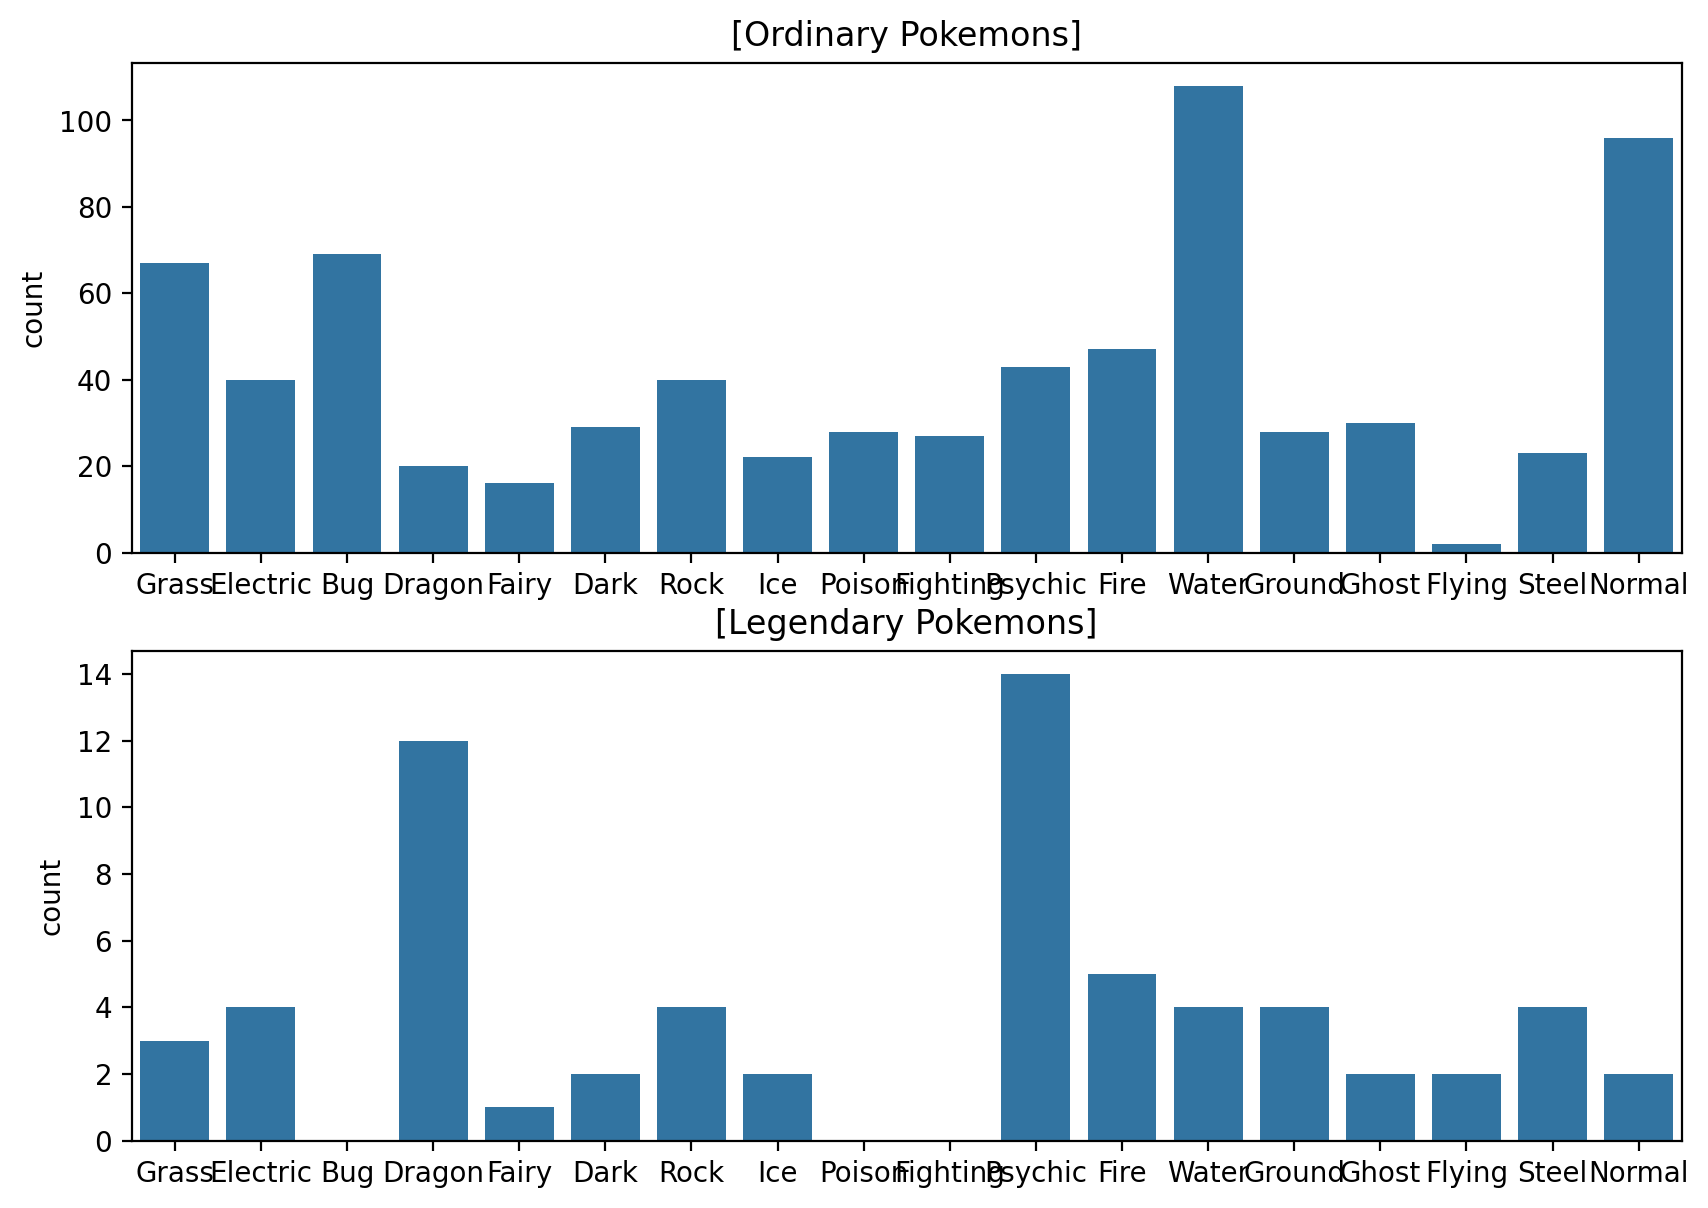

In [410]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [411]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


<ipython-input-412-5e98f06ef81f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type 1", data=ordinary, order=ordinary["Type 1"].value_counts().index, palette="Blues")
<ipython-input-412-5e98f06ef81f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type 1", data=legendary, order=legendary["Type 1"].value_counts().index, palette="Reds")


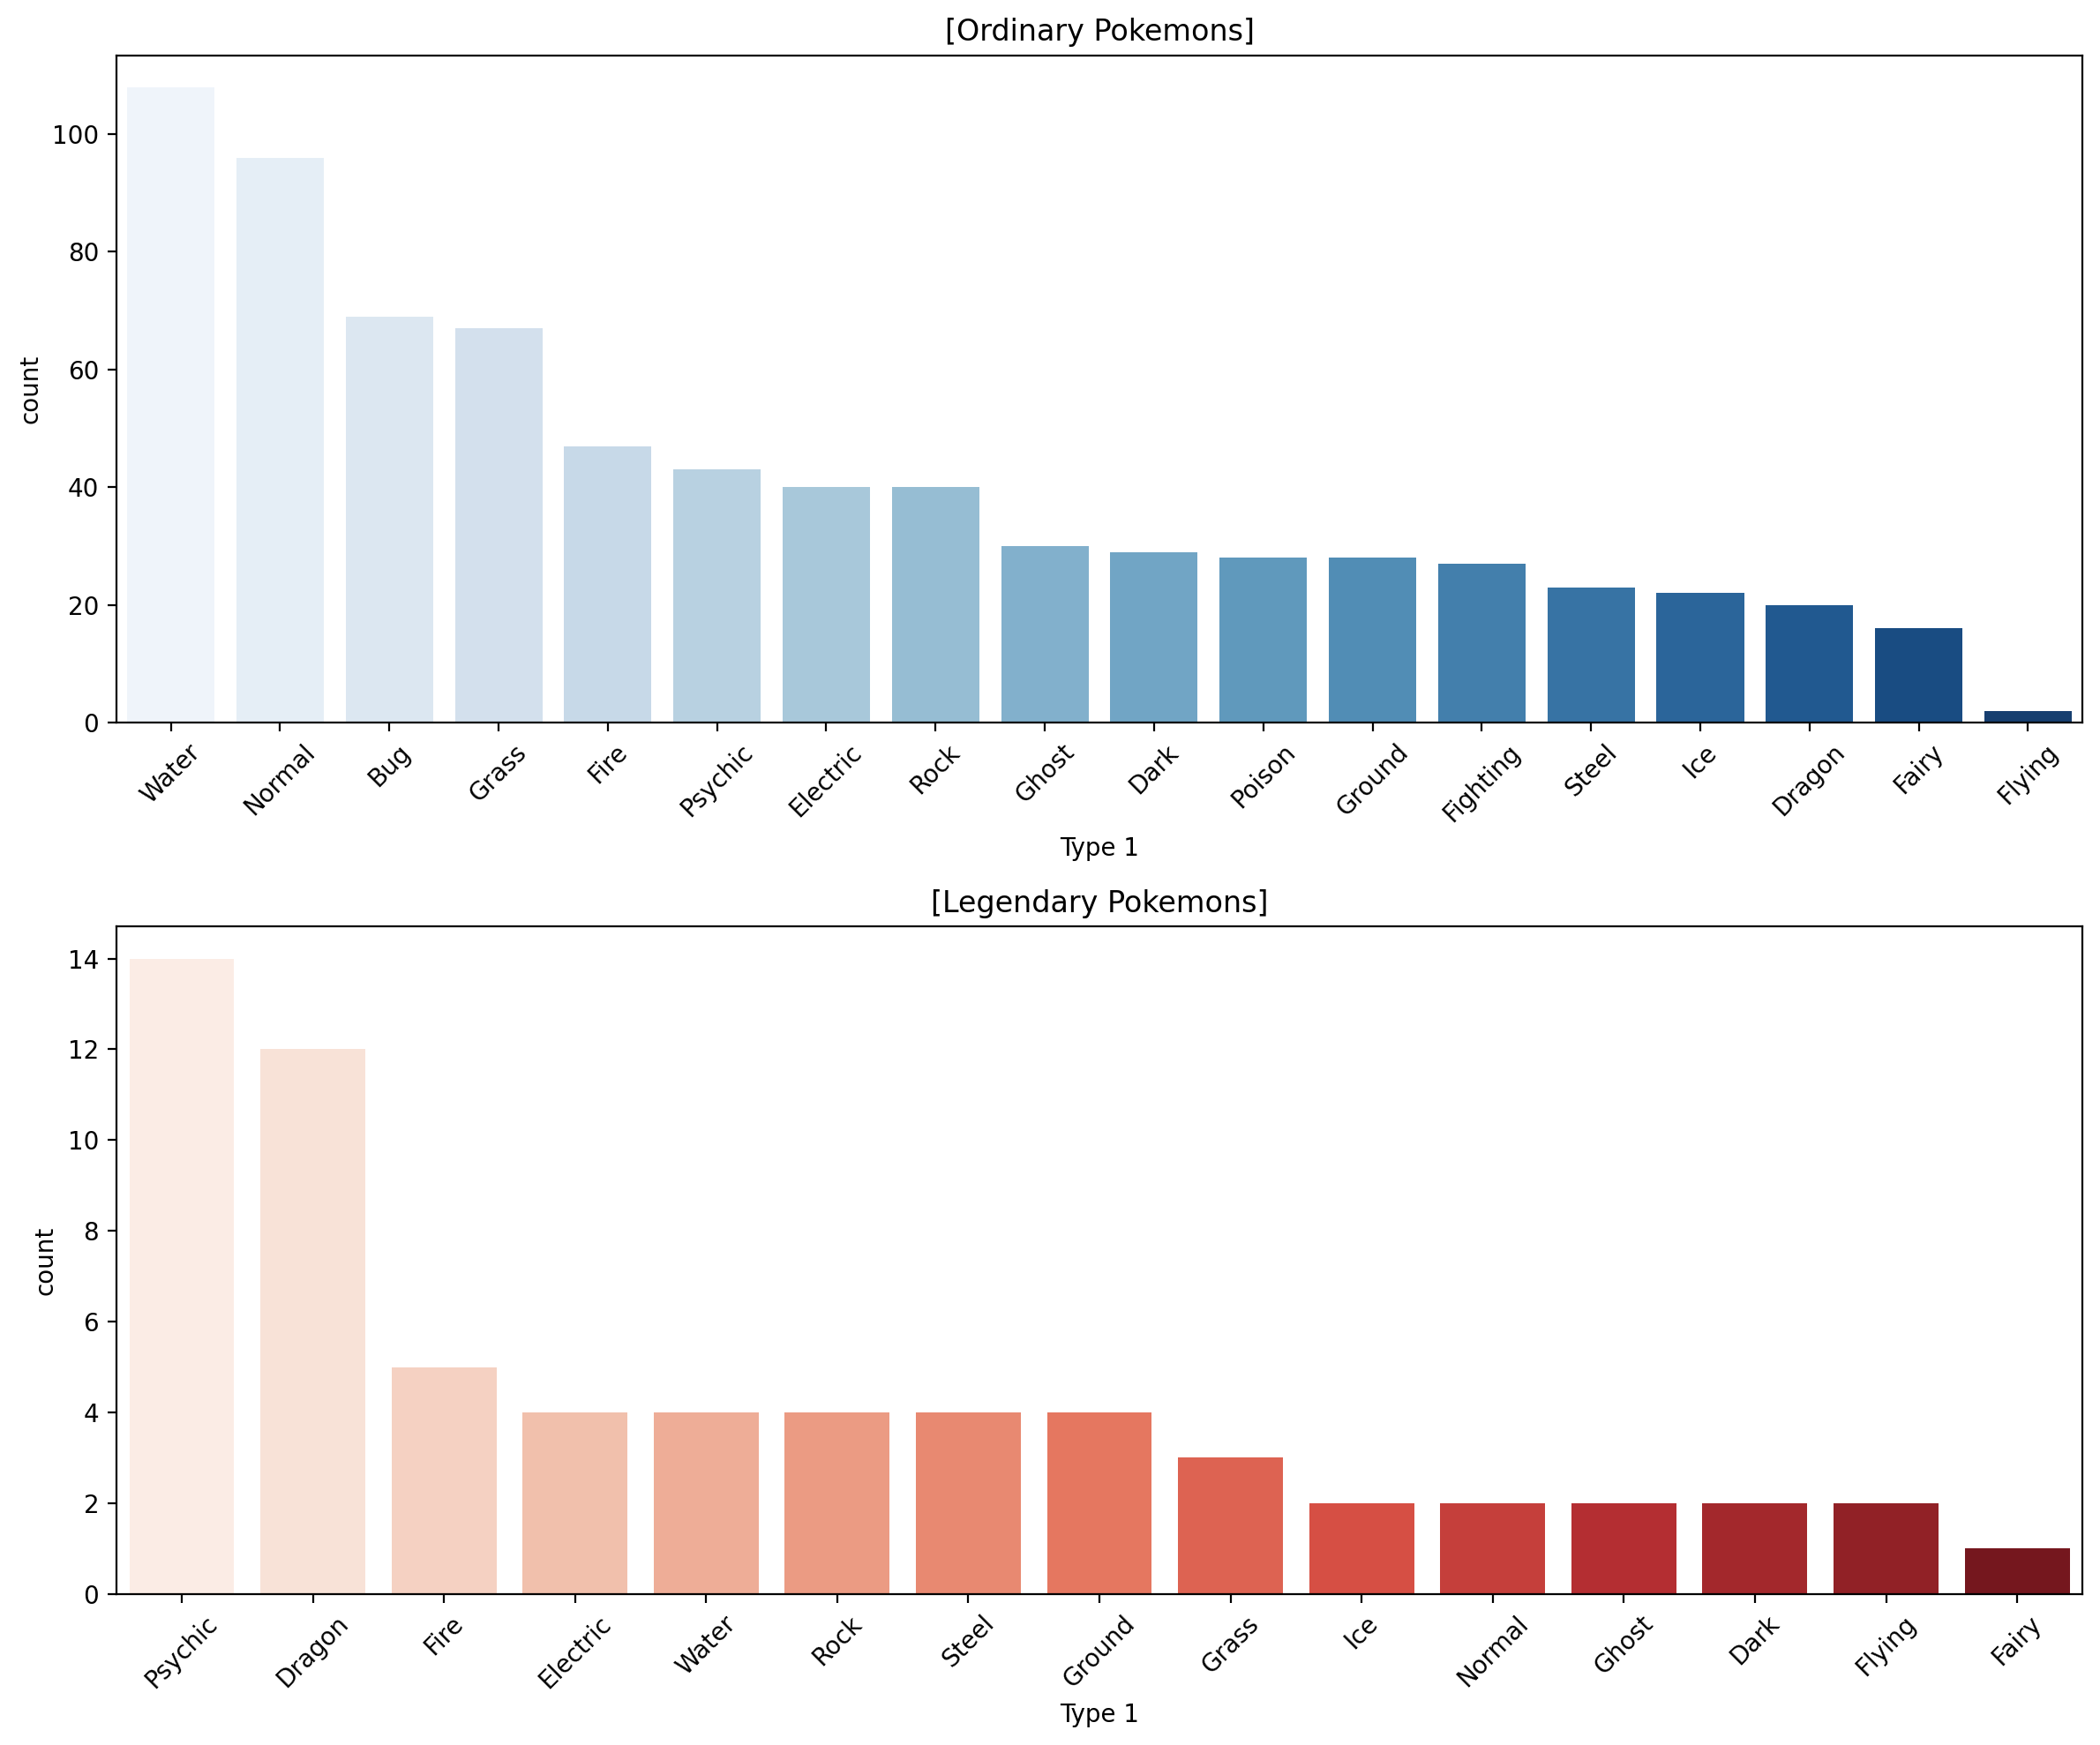

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # 그래프 크기 설정

# 🔹 일반 포켓몬 (Ordinary) 갯수 시각화
plt.subplot(2, 1, 1)  # 2행 1열의 첫 번째 그래프
sns.countplot(x="Type 1", data=ordinary, order=ordinary["Type 1"].value_counts().index, palette="Blues")
plt.xticks(rotation=45)  # X축 글자 기울이기
plt.title("[Ordinary Pokemons]")

# 🔹 전설 포켓몬 (Legendary) 갯수 시각화
plt.subplot(2, 1, 2)  # 2행 1열의 두 번째 그래프
sns.countplot(x="Type 1", data=legendary, order=legendary["Type 1"].value_counts().index, palette="Reds")
plt.xticks(rotation=45)
plt.title("[Legendary Pokemons]")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()


In [413]:
# Type 2별 포켓몬 갯수를 피벗 테이블로 정리
pivot_type2 = pokemon.pivot_table(index="Type 2", values="Name", aggfunc="count")

# 결과 확인
pivot_type2


,Name
Type 2,
Bug,3
Dark,20
Dragon,18
Electric,6
Fairy,23
Fighting,26
Fire,12
Flying,97
Ghost,14


In [414]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [415]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [416]:
# 개별 스탯 컬럼 정의
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# "Total" 값과 개별 스탯의 총합 비교
matching_count = (pokemon["Total"].values == pokemon[stats].sum(axis=1).values).sum()

# 결과 출력
print(f"Total 값과 개별 스탯 합이 같은 포켓몬의 수: {matching_count}")


Total 값과 개별 스탯 합이 같은 포켓몬의 수: 800


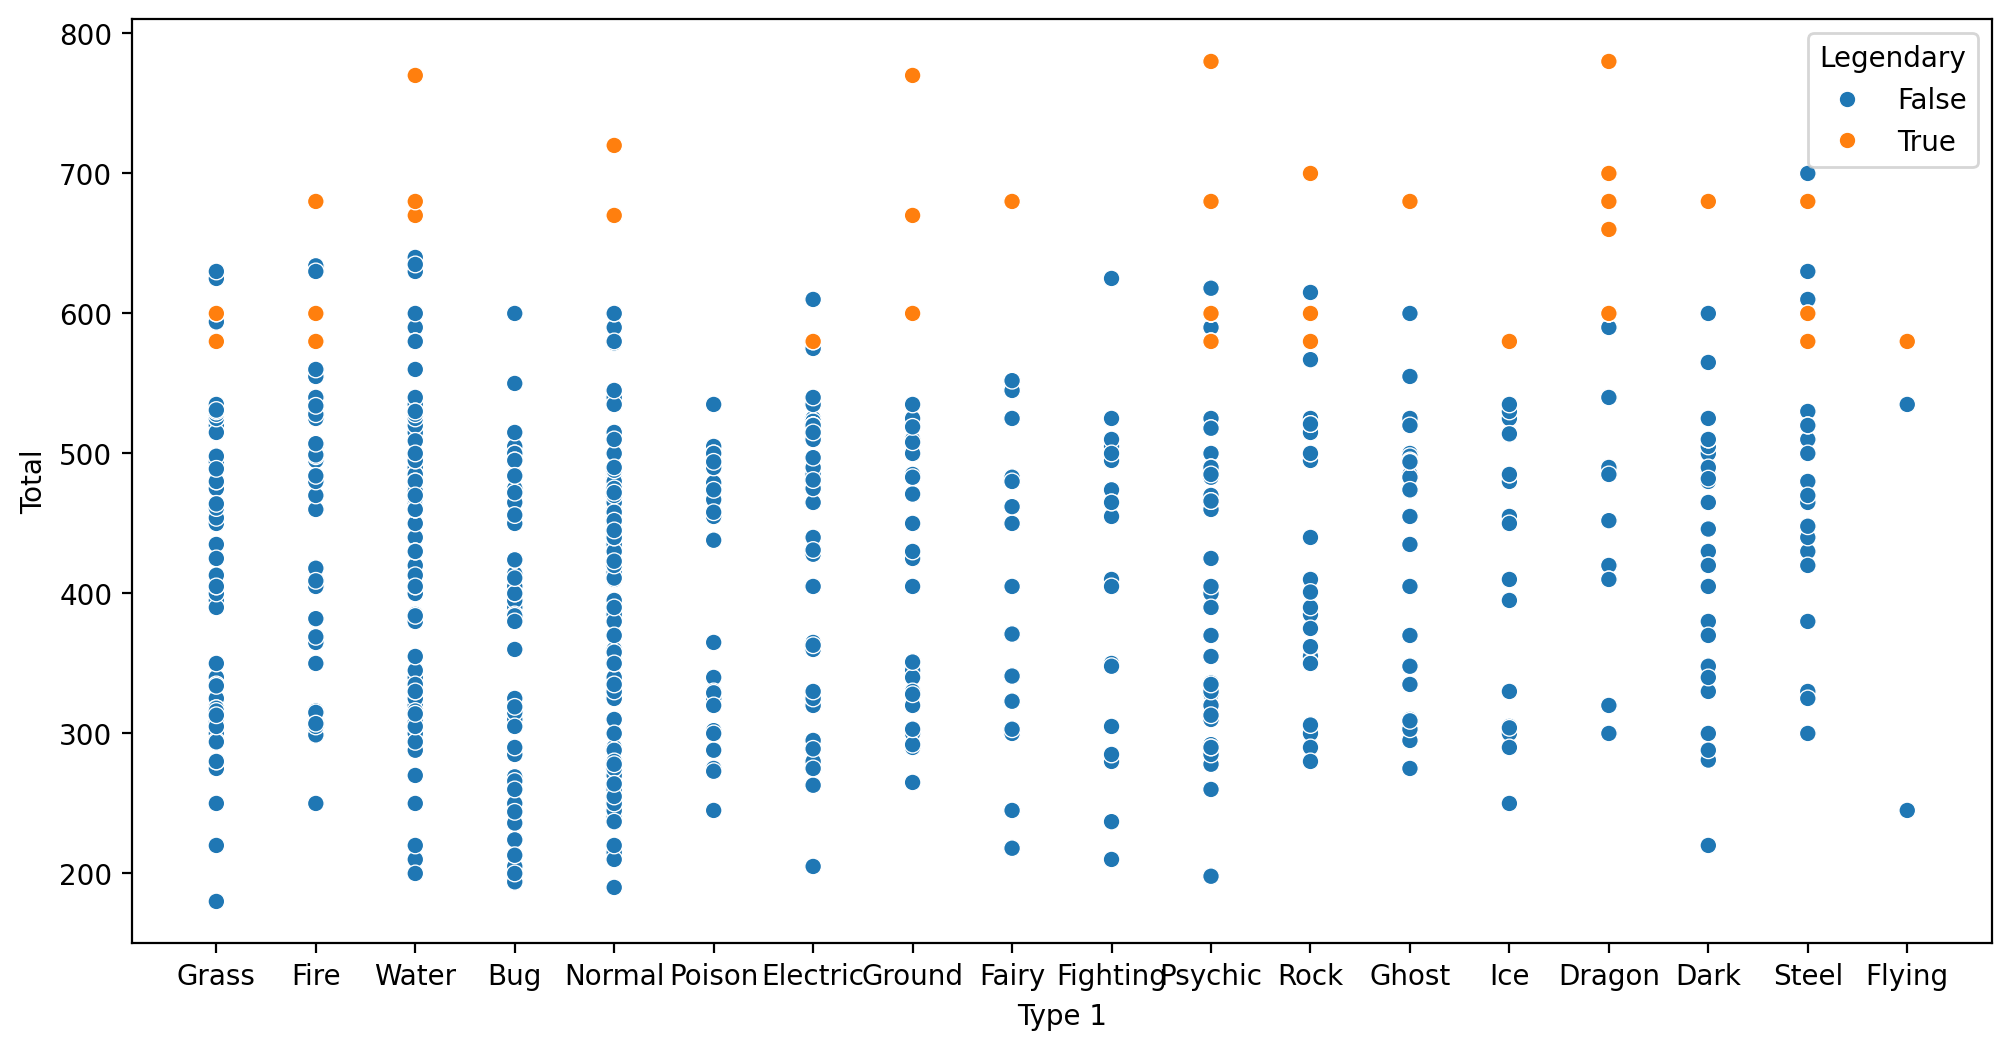

In [417]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

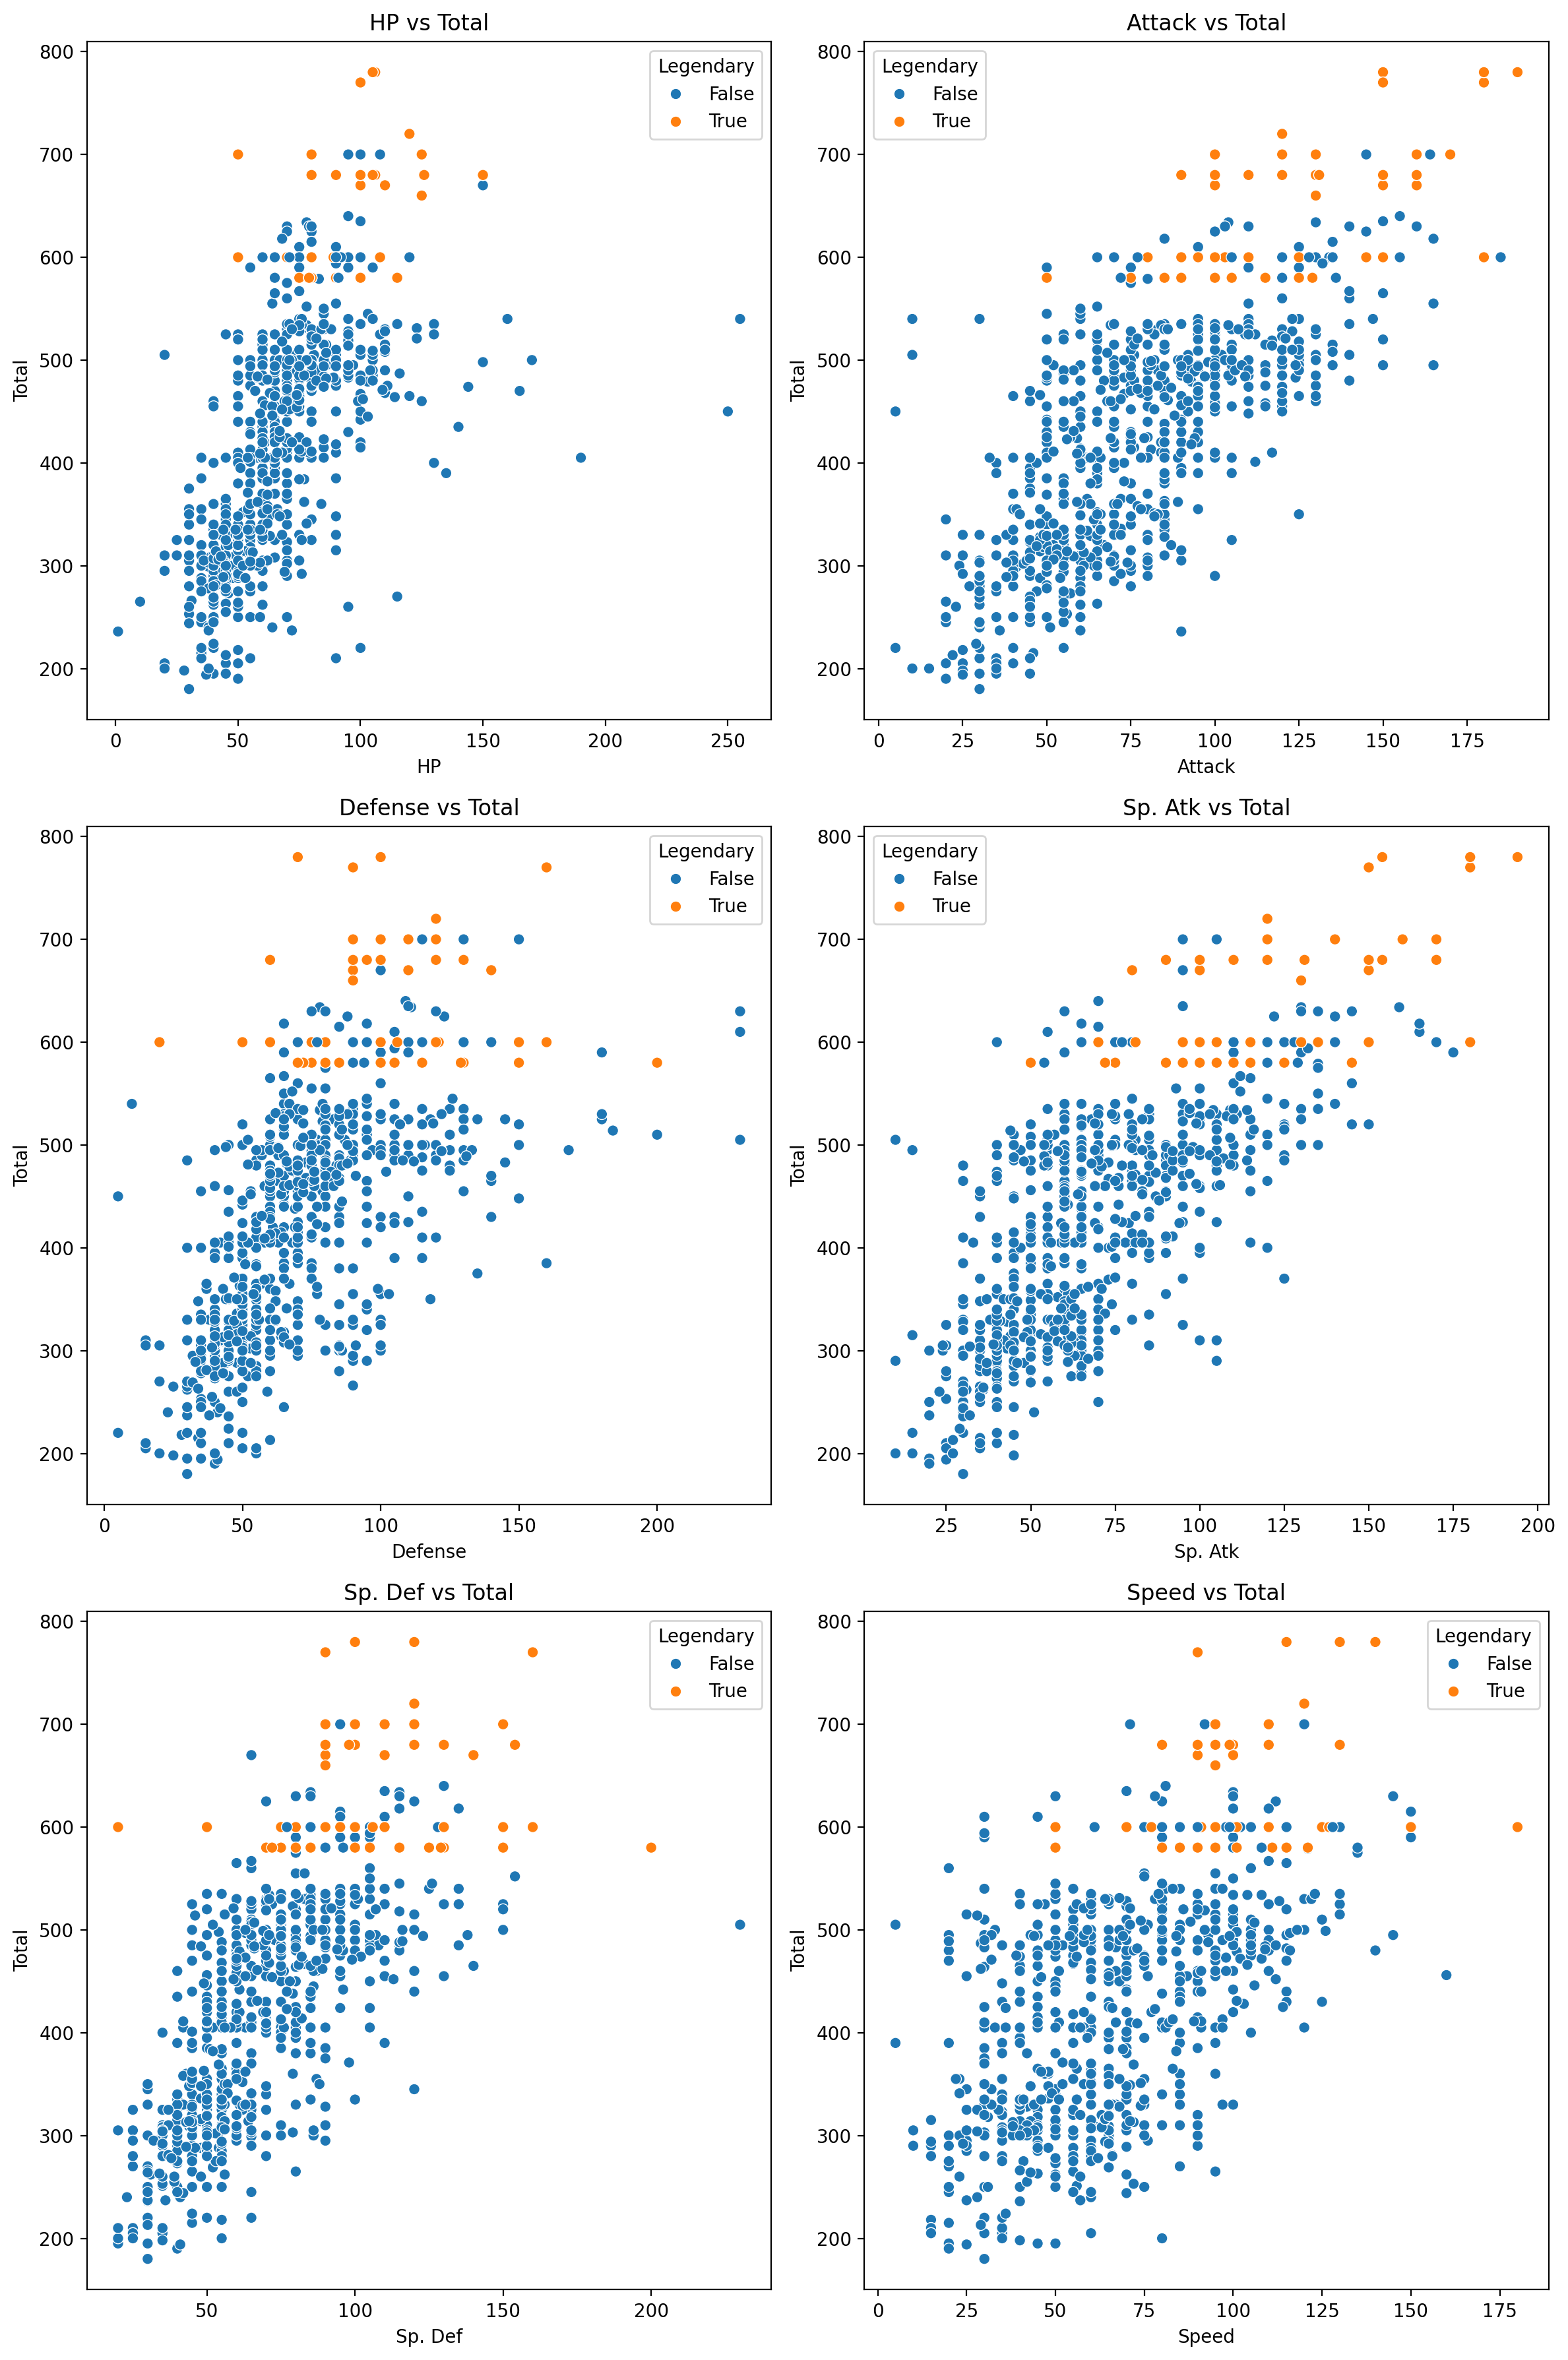

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 생성 (3행 2열)
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 그래프 크기 조정

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
ax1.set_title("HP vs Total")

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
ax2.set_title("Attack vs Total")

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
ax3.set_title("Defense vs Total")

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
ax4.set_title("Sp. Atk vs Total")

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
ax5.set_title("Sp. Def vs Total")

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
ax6.set_title("Speed vs Total")

plt.tight_layout()  # 그래프 간격 조정
plt.show()


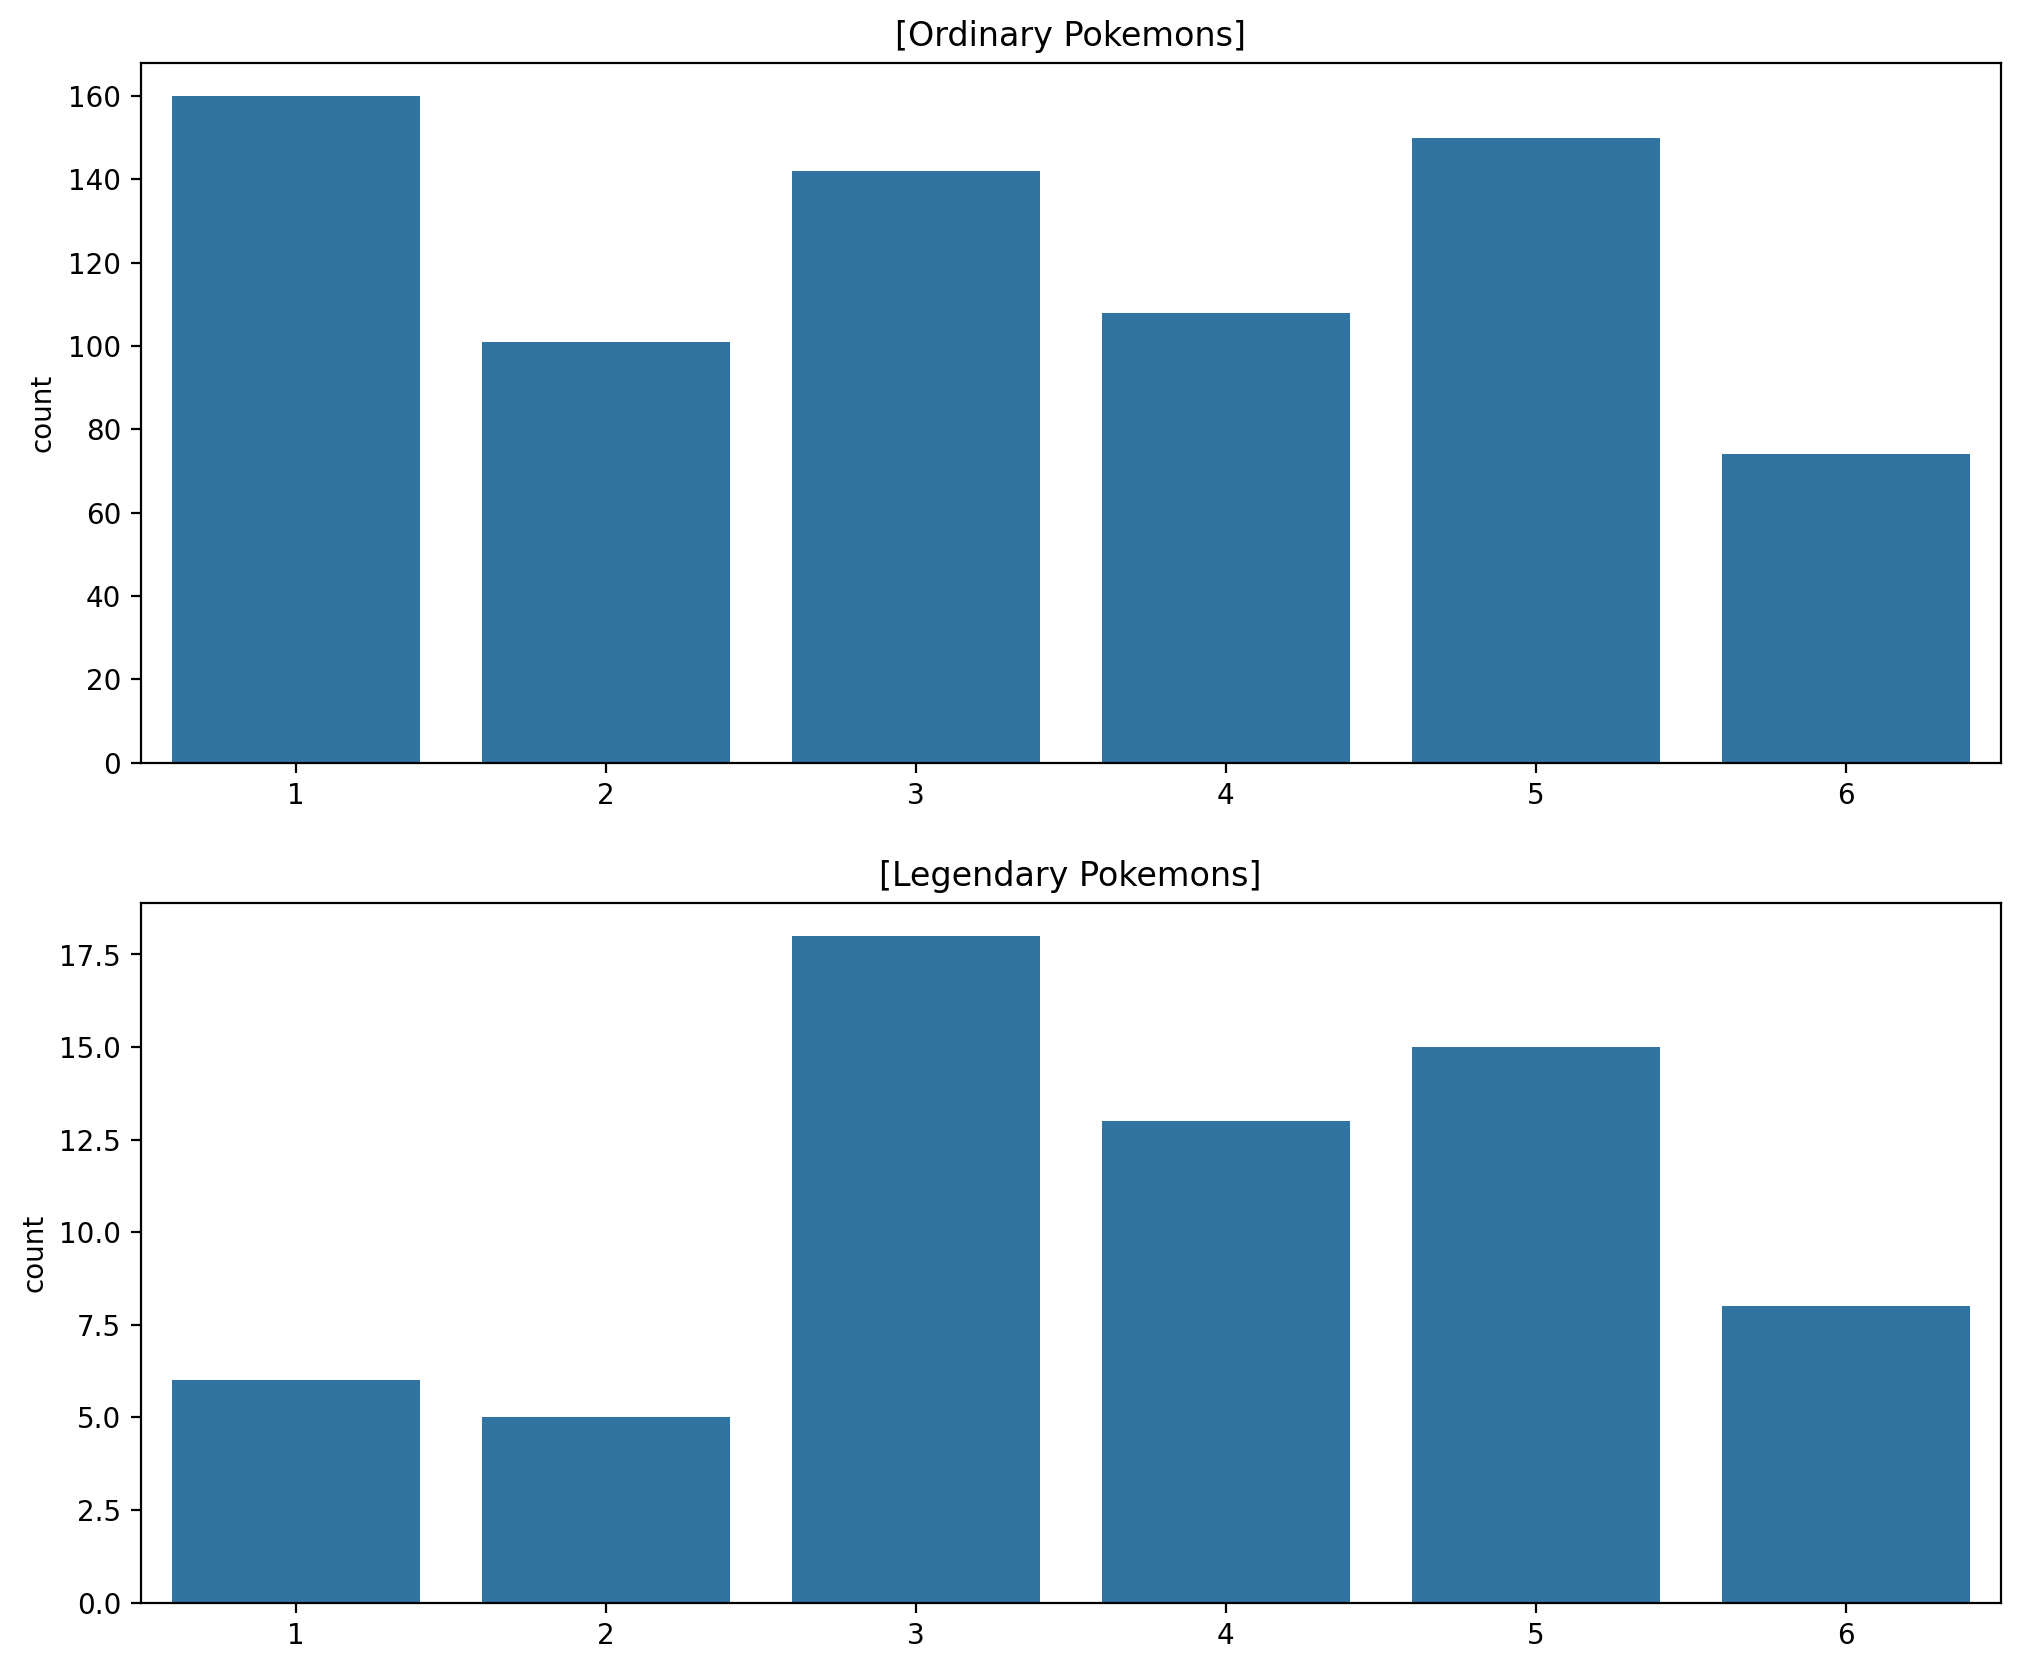

In [419]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

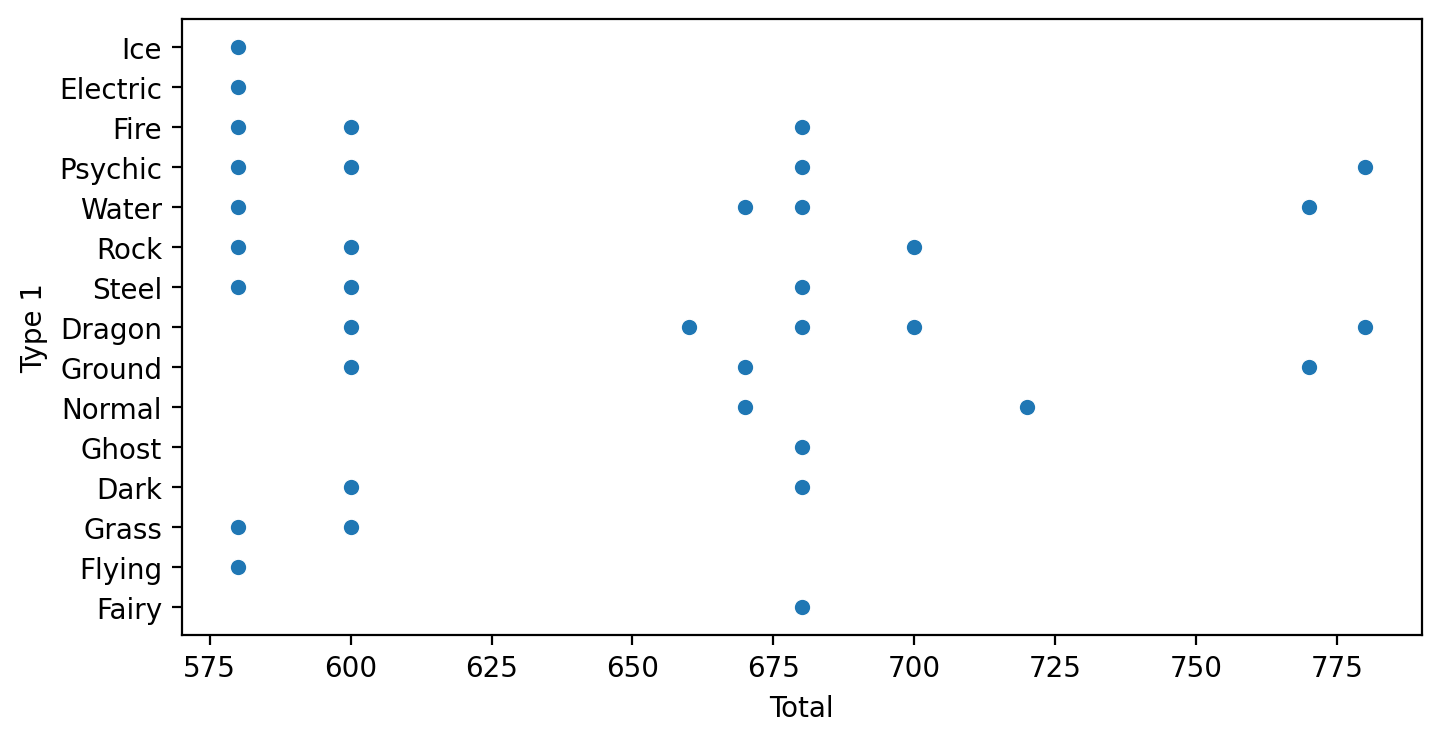

In [420]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [421]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


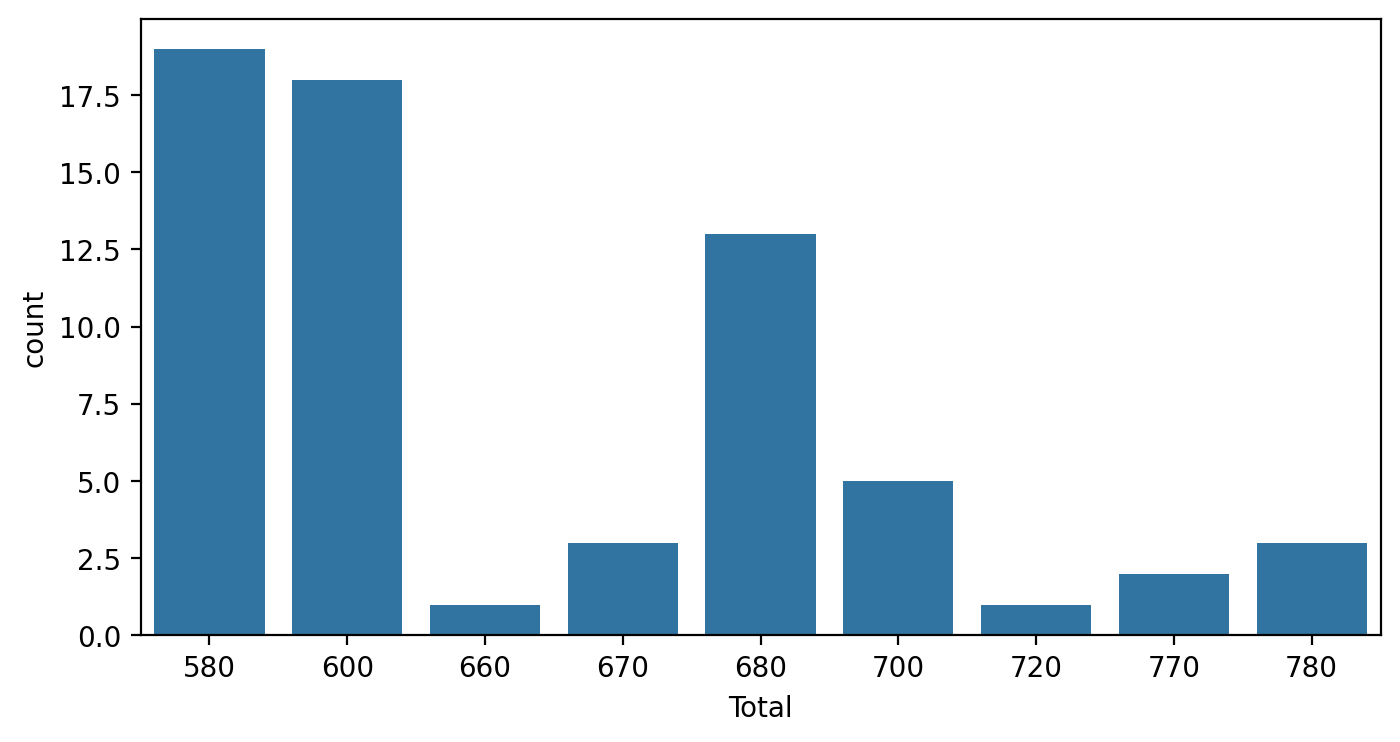

In [422]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [423]:
round(65 / 9, 2)

7.22

In [424]:
# Ordinary 포켓몬의 Total 값 집합(Set) 확인
ordinary_total_values = set(ordinary["Total"])

# 결과 출력
print(ordinary_total_values)


{514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 180, 700, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510}


In [425]:
# Ordinary 포켓몬의 Total 값 집합(Set) 크기 확인
ordinary_total_set_size = len(set(ordinary["Total"]))

# 결과 출력
print(f"Ordinary 포켓몬의 Total 값 개수: {ordinary_total_set_size}")


Ordinary 포켓몬의 Total 값 개수: 195


In [426]:
round(735 / 195, 2)

3.77

In [427]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [428]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [429]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [430]:
# Ordinary 포켓몬 데이터에 "name_count" 추가
ordinary["name_count"] = ordinary["Name"].map(ordinary["Name"].value_counts())

# 결과 확인
ordinary.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1


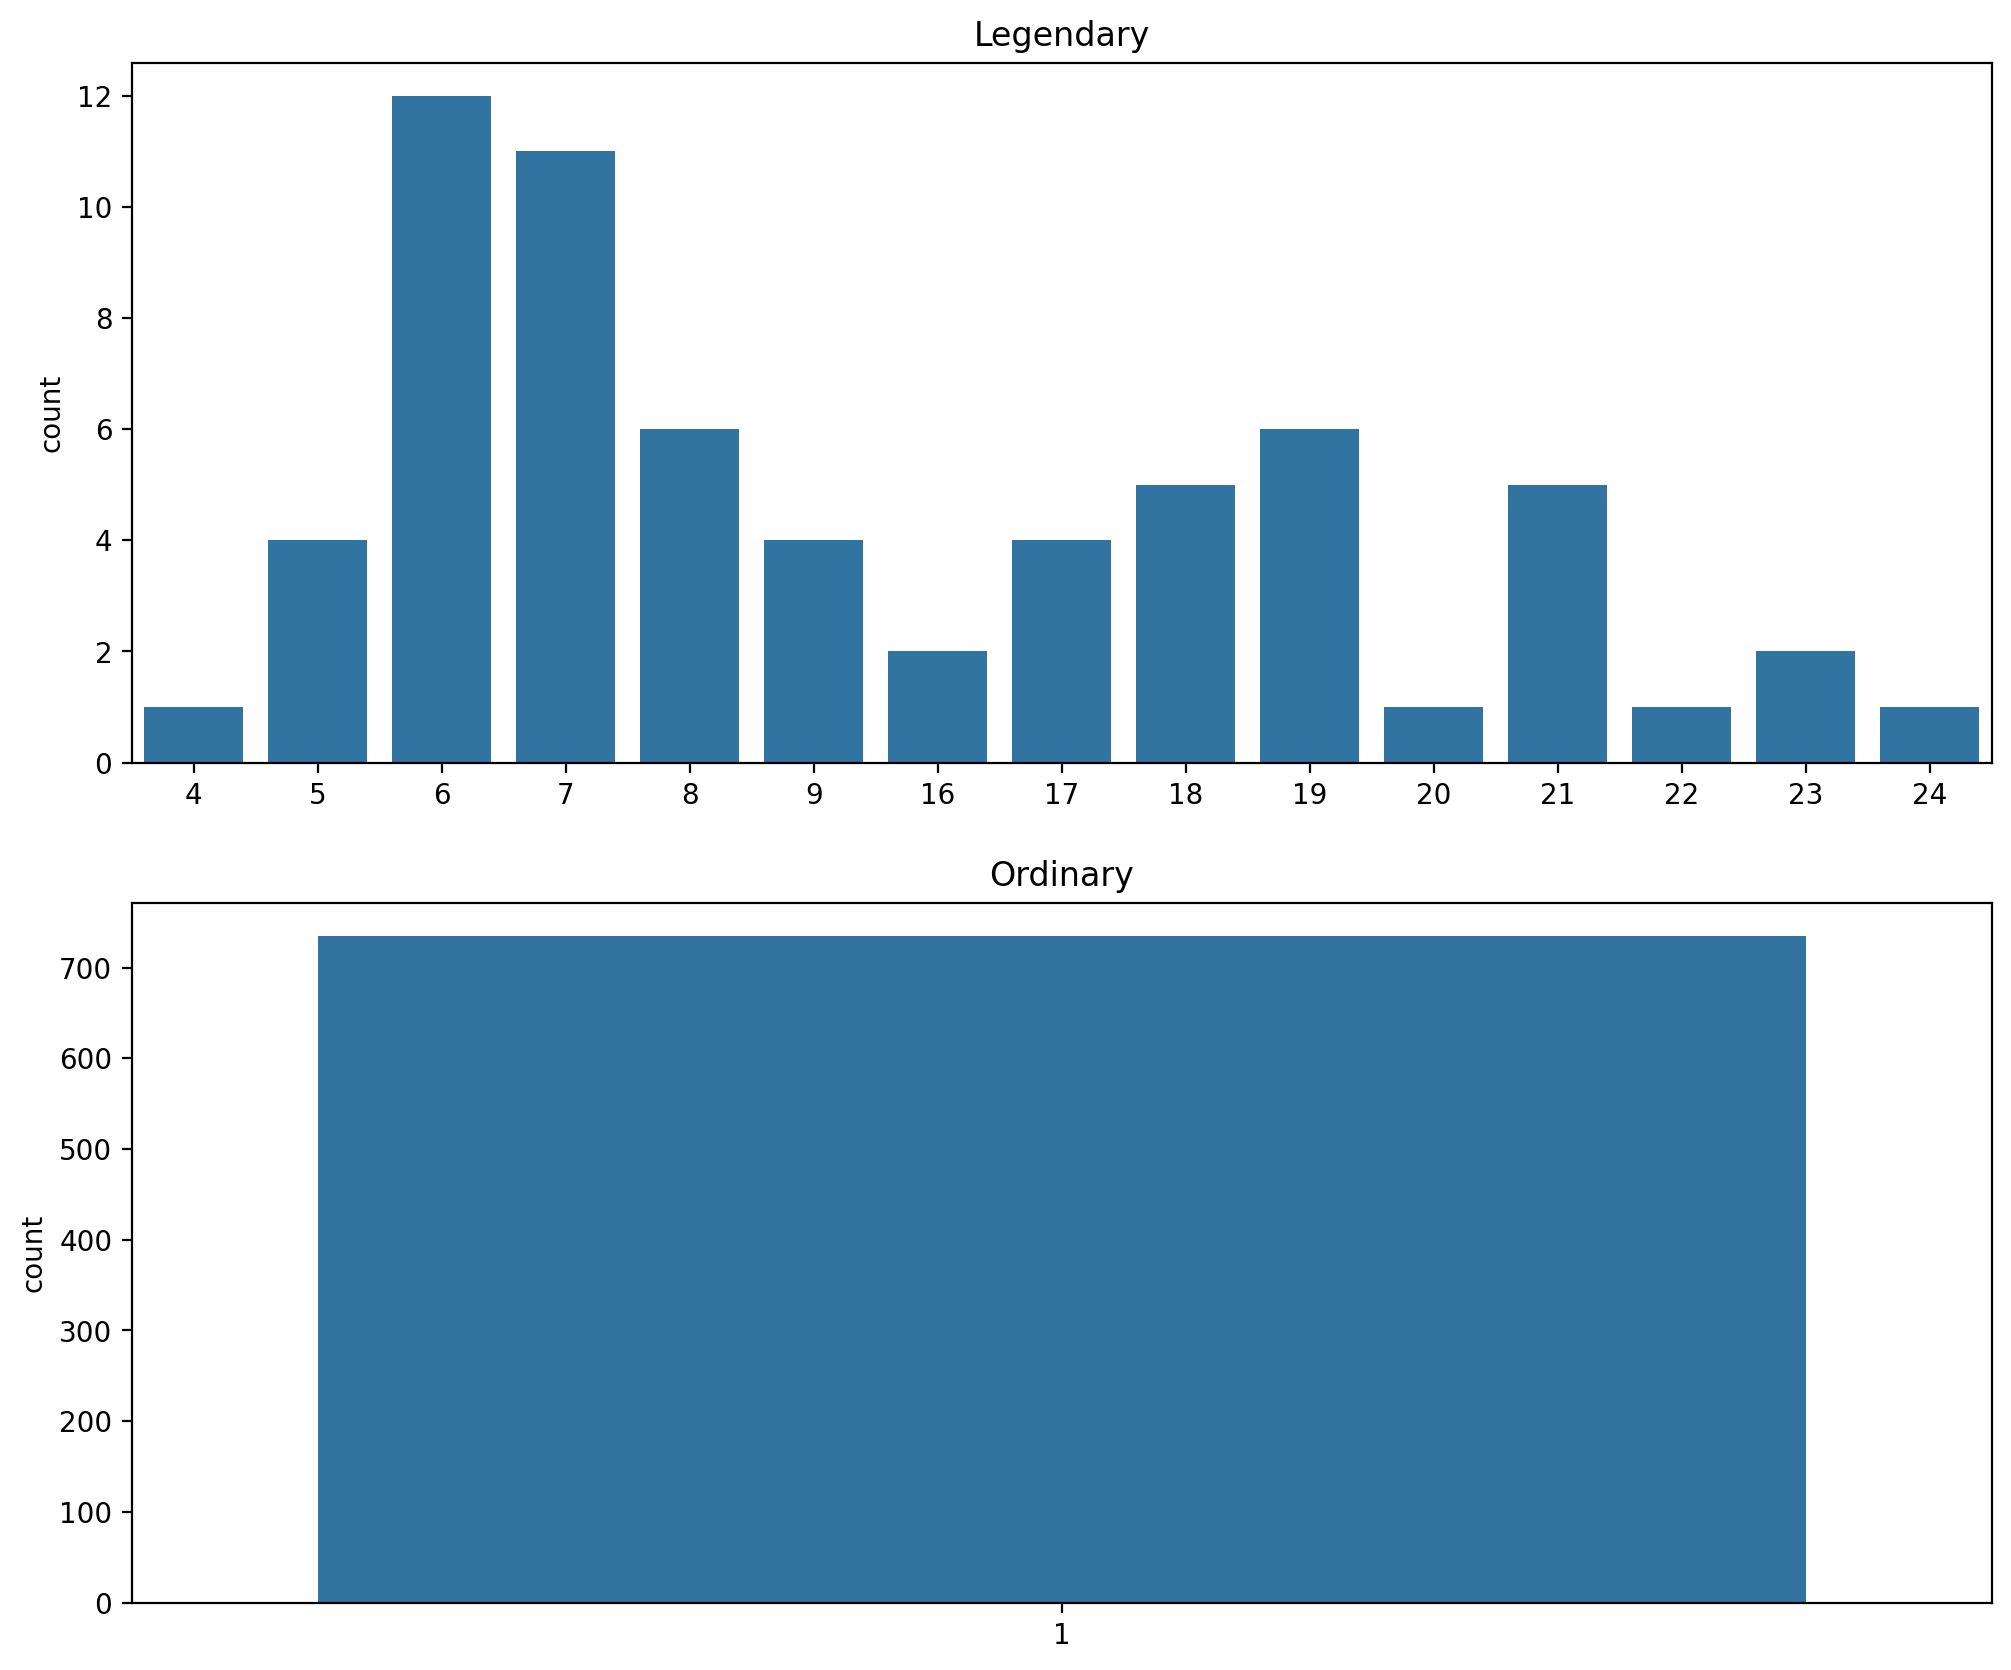

In [431]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [432]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [433]:
# 1. 일반 포켓몬의 이름 길이 계산
ordinary["name_length"] = ordinary["Name"].apply(len)

# 2. 이름이 10글자 이상인 포켓몬 수 계산
long_name_count = (ordinary["name_length"] >= 10).sum()

# 3. 전체 일반 포켓몬 수
total_ordinary_count = len(ordinary)

# 4. 확률 계산 (비율)
probability_long_name = long_name_count / total_ordinary_count

# 결과 출력
print(f"일반 포켓몬의 이름이 10글자 이상일 확률: {probability_long_name:.4f}")


일반 포켓몬의 이름이 10글자 이상일 확률: 0.1565


In [434]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [435]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [436]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [437]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [438]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [439]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [440]:
# 1. 'Name'에서 공백을 제거하여 'Name_nospace' 생성
pokemon["Name_nospace"] = pokemon["Name"].str.replace(" ", "")

# 2. 'Name_nospace'에 대해 isalpha() 적용 (알파벳만 포함 여부 확인)
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(str.isalpha)

# 3. 알파벳 이외의 문자가 포함된 포켓몬 출력
pokemon[pokemon["name_isalpha"] == False]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [441]:
import re

In [442]:
name = "CharizardMega Charizard X"

In [443]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [444]:
temp = name_split[0]
temp

'CharizardMega'

In [445]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [446]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [448]:
import numpy as np

def tokenize(name):
    # 이름을 문자 단위로 분리
    tokens = list(name)

    return np.array(tokens)


In [449]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['C', 'h', 'a', 'r', 'i', 'z', 'a', 'r', 'd', 'M', 'e', 'g', 'a',
       ' ', 'C', 'h', 'a', 'r', 'i', 'z', 'a', 'r', 'd', ' ', 'X'],
      dtype='<U1')

In [451]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

55
['A', 'r', 't', 'i', 'c', 'u', 'n', 'o', 'Z', 'a', 'p', 'd', 'o', 's', 'M', 'o', 'l', 't', 'r', 'e', 's', 'M', 'e', 'w', 't', 'w', 'o', 'M', 'e', 'w', 't', 'w', 'o', 'M', 'e', 'g', 'a', ' ', 'M', 'e', 'w', 't', 'w', 'o', ' ', 'X', 'M', 'e', 'w', 't', 'w', 'o', 'M', 'e', 'g', 'a', ' ', 'M', 'e', 'w', 't', 'w', 'o', ' ', 'Y', 'R', 'a', 'i', 'k', 'o', 'u', 'E', 'n', 't', 'e', 'i', 'S', 'u', 'i', 'c', 'u', 'n', 'e', 'L', 'u', 'g', 'i', 'a', 'H', 'o', '-', 'o', 'h', 'R', 'e', 'g', 'i', 'r', 'o', 'c', 'k', 'R', 'e', 'g', 'i', 'c', 'e', 'R', 'e', 'g', 'i', 's', 't', 'e', 'e', 'l', 'L', 'a', 't', 'i', 'a', 's', 'L', 'a', 't', 'i', 'a', 's', 'M', 'e', 'g', 'a', ' ', 'L', 'a', 't', 'i', 'a', 's', 'L', 'a', 't', 'i', 'o', 's', 'L', 'a', 't', 'i', 'o', 's', 'M', 'e', 'g', 'a', ' ', 'L', 'a', 't', 'i', 'o', 's', 'K', 'y', 'o', 'g', 'r', 'e', 'K', 'y', 'o', 'g', 'r', 'e', 'P', 'r', 'i', 'm', 'a', 'l', ' ', 'K', 'y', 'o', 'g', 'r', 'e', 'G', 'r', 'o', 'u', 'd', 'o', 'n', 'G', 'r', 'o', 'u', 'd', '

In [452]:
from collections import Counter

In [453]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [454]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [455]:
most_common = Counter(token_set).most_common(10)
most_common

[('e', 78),
 ('a', 76),
 ('o', 65),
 ('r', 61),
 ('i', 54),
 ('n', 43),
 (' ', 29),
 ('t', 28),
 ('u', 28),
 ('m', 27)]

In [456]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,e,a,o,r,i,n,,t,u,m
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,True,False,True,False,False,False,False,True,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,True,False,True,False,False,False,False,True,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,True,False,True,False,True,False,False,True,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,True,True,False,True,False,True,True,False,True,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,True,True,False,True,False,True,False,False,False,True
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,True,True,True,True,False,True,False,False,False,True
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,True,False,True,True,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,True,True,False,True,True,False,True,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,True,True,False,True,True,False,True,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,True,False,False,True,True,False,False,True,True,False


In [457]:
print(types)

['Grass', 'Electric', 'Bug', 'Dragon', 'Fairy', 'Dark', 'Rock', 'Ice', 'Poison', 'Fighting', 'Psychic', 'Fire', 'Water', 'Ground', 'Ghost', 'Flying', 'Steel', 'Normal']


In [458]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Grass,Electric,Bug,Dragon,Fairy,Dark,Rock,Ice,Poison,Fighting,Psychic,Fire,Water,Ground,Ghost,Flying,Steel,Normal
0,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [459]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [460]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [461]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [462]:
target = 'Legendary'

In [463]:
# 'features' 리스트에 포함된 컬럼을 'original_data'에서 선택하여 'X'에 저장
X = original_data[features]

# 결과 확인
print(X.shape)  # 데이터의 차원 출력
X.head()  # 상위 5개 데이터 출력


(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [464]:
# 'Lengendary' 컬럼의 데이터를 'y'에 저장
y = original_data["Legendary"]

# 결과 확인
print(y.shape)  # 데이터의 크기 출력
y.head()  # 상위 5개 데이터 출력


(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [465]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [466]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [467]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [468]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [469]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [470]:
len(legendary)

65

In [471]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [472]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'e', 'a', 'o', 'r', 'i',
       'n', ' ', 't', 'u', 'm', 'Grass', 'Electric', 'Bug', 'Dragon', 'Fairy',
       'Dark', 'Rock', 'Ice', 'Poison', 'Fighting', 'Psychic', 'Fire', 'Water',
       'Ground', 'Ghost', 'Flying', 'Steel', 'Normal'],
      dtype='object')


In [473]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [474]:
target = "Legendary"
target

'Legendary'

In [475]:
# 사용할 feature(특징) 리스트 정의 (예: 모델 학습에 필요한 컬럼)
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Total"]

# features 컬럼만 선택하여 'X' 변수에 저장
X = original_data[features]

# 결과 확인
print(X.shape)  # 데이터 차원 출력
X.head()  # 상위 5개 행 출력


(800, 7)


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,45,49,49,65,65,45,318
1,60,62,63,80,80,60,405
2,80,82,83,100,100,80,525
3,80,100,123,122,120,80,625
4,39,52,43,60,50,65,309


In [476]:
# 'target' 컬럼의 데이터를 'y' 변수에 저장
y = original_data["Legendary"]

# 결과 확인
print(y.shape)  # 데이터 크기 출력
y.head()  # 상위 5개 값 출력


(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 7) (640,)
(160, 7) (160,)


In [478]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [479]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Decision Tree 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 결과 출력 (예측값 상위 5개)
print(y_pred[:5])


[ True False False False False]


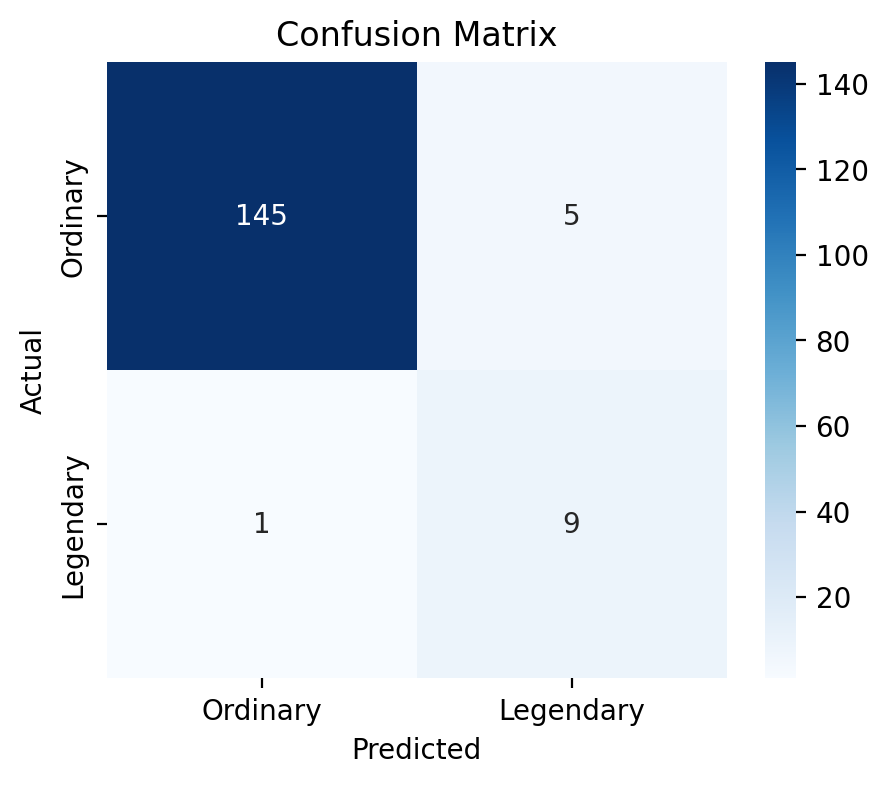

In [480]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)

# 2. Confusion Matrix 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ordinary", "Legendary"], yticklabels=["Ordinary", "Legendary"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [481]:
from sklearn.metrics import classification_report

# Classification Report 출력
report = classification_report(y_test, y_pred, target_names=["Ordinary", "Legendary"])
print(report)


              precision    recall  f1-score   support

    Ordinary       0.99      0.97      0.98       150
   Legendary       0.64      0.90      0.75        10

    accuracy                           0.96       160
   macro avg       0.82      0.93      0.86       160
weighted avg       0.97      0.96      0.97       160



# **프로젝트 요약**

- **데이터 전처리:** 결측치 처리, 범주형 변수 변환, 정규화 적용
- **기본 모델:** Decision Tree
- **Feature Engineering:** 새로운 특성을 추가하여 모델 성능 개선 시도
- **비교 모델 실험:** Random Forest, SVM, Logistic Regression을 사용하여 성능 비교
- **최적 모델:** (예: Random Forest가 가장 높은 정확도를 기록함)


# **회고 (Reflection)**

✅ 이번 프로젝트에서 배운 점:
- 데이터 전처리를 철저히 하면 모델 성능이 향상됨을 확인했다.
- Decision Tree는 단순한 데이터에서는 높은 성능을 보이지만, 과적합 가능성이 있다.

📌 앞으로 개선할 점:
- 딥러닝을 적용하면 더 좋은 결과가 나올지도 모른다.


# **참고문헌**

Deep Learning with Python 케라스 창시자에게 배우는 딥러닝 (프랑소와 숄레 지음)